In [29]:
%load_ext autoreload
%autoreload 2

In [7]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

# Simple gates in Qiskit

## Single Qubit gates

It is straightforward to create and draw a single  qubit with Qiskit:

In [1]:
# Load qiskit functions into the local namespace
from qiskit import *       
import matplotlib.pyplot as plt

# Create a circuit qc with 1 qubit and 1 classical bit
qc = QuantumCircuit(3,1)   

# Draw the circuit ('mpl'asks to render using Matplotlib) 
qc.draw(output = 'mpl');    

We can also check the state of the qubit on the BlochSphere:

**Note:** *The Bloch sphere is a geometric representation of the pure state of a qubit on a unit sphere in three-dimensional space and is used to visualize and describe the quantum state of the qubit. Quantum gates and operations on a qubit can be visualized as rotations of the state vector on the Bloch sphere.*

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


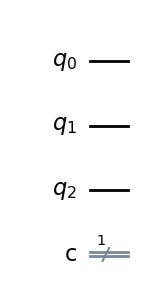

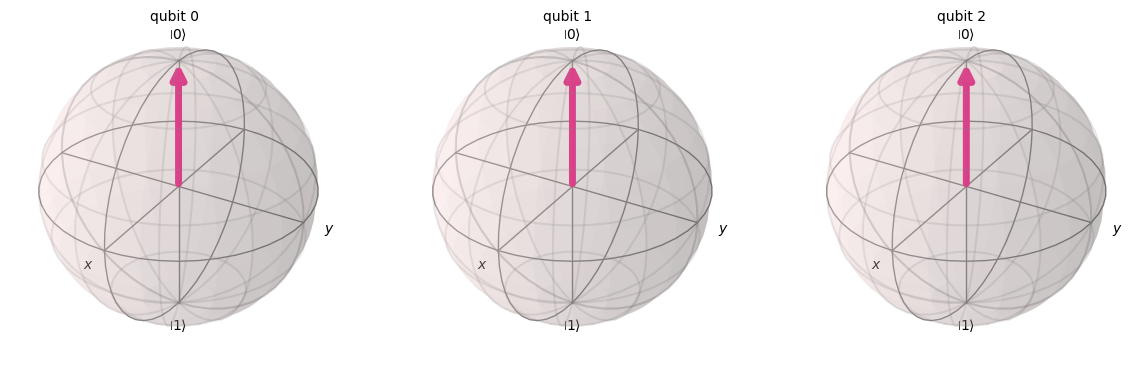

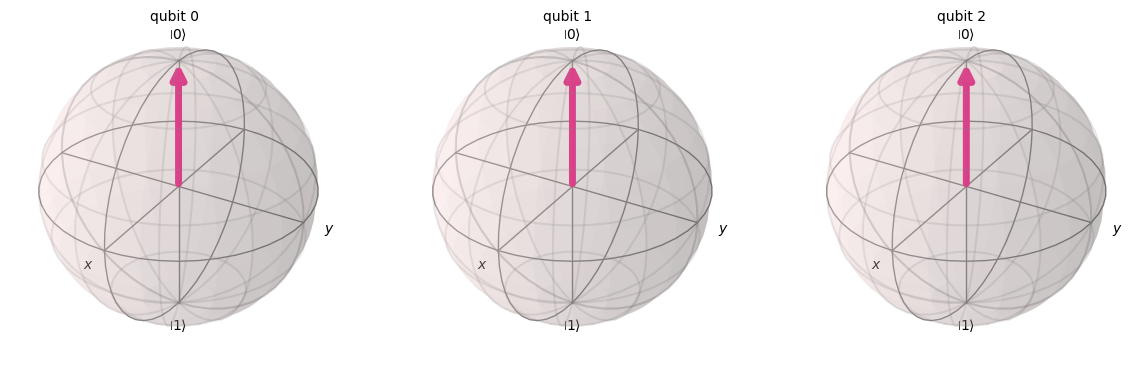

In [8]:
# subpackages need to be separately imported
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector

init_state = Statevector(qc);   
print(init_state)  

plot_bloch_multivector(init_state);

#### PAULI GATES X, Y, Z

The Pauli gates are single-qubit gates that perform rotations about the respective axes of the Bloch sphere.

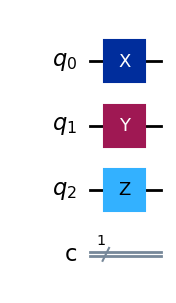

In [32]:
qc.x(0);                        # Apply a PauliX to the q0 of qc
qc.y(1);                        # Apply a PauliY to the q0 of qc
qc.z(2);                        # Apply a PauliZ to the q0 of qc
qc.draw(output = 'mpl');

We can also check the qubits new states on the Bloch Sphere

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


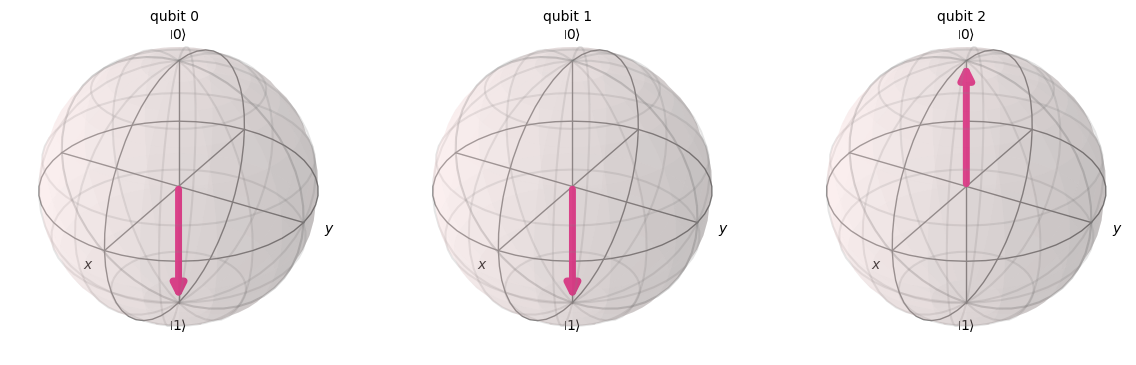

In [33]:
pauli_state = Statevector(qc);   
print(pauli_state)  

plot_bloch_multivector(pauli_state);

### Hadamard gate

The Hadamard gate creates a superposition state from a computational basis state.

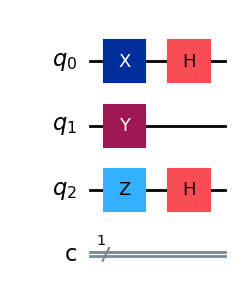

In [34]:
qc.h(0);                        # Apply a Hadamard to the q0 of qc
qc.h(2);                        # Apply a Hadamard to the q2 of qc
qc.draw(output = 'mpl');

We can also check the qubits new states on the Bloch Sphere after a Hadamard gate operation:

Statevector([0.+0.j , 0.+0.j , 0.+0.5j, 0.-0.5j, 0.+0.j , 0.+0.j , 0.+0.5j,
             0.-0.5j],
            dims=(2, 2, 2))


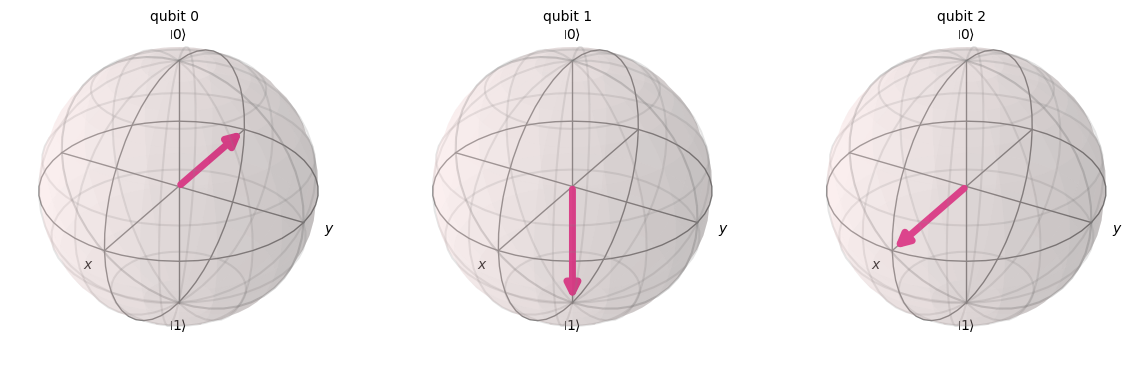

In [35]:
h_state = Statevector(qc); 
print(h_state)  

plot_bloch_multivector(h_state);

### Rotation gates RX, RY, RZ

Rotation gates rotate the state of a qubit around a specific axis of the Bloch sphere by a given angle.

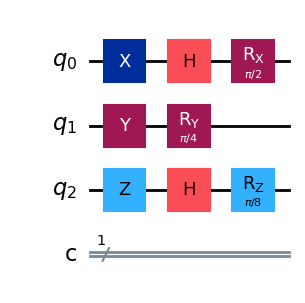

In [36]:
import numpy as np

# Example: Set rotation angles for each gate
angle_x = np.pi / 2   # Rotation angle around the X-axis for Qubit 0
angle_y = np.pi / 4   # Rotation angle around the Y-axis for Qubit 1
angle_z = np.pi / 8   # Rotation angle around the Z-axis for Qubit 0

qc.rx(angle_x, 0);  
qc.ry(angle_y, 1);  
qc.rz(angle_z, 2);  
qc.draw(output = 'mpl');

Let's check the qubits new states on the Bloch Sphere after a rotation gate operation:

Statevector([ 0.10630376-0.15909482j, -0.10630376+0.15909482j,
             -0.25663998+0.38408888j,  0.25663998-0.38408888j,
              0.15909482-0.10630376j, -0.15909482+0.10630376j,
             -0.38408888+0.25663998j,  0.38408888-0.25663998j],
            dims=(2, 2, 2))


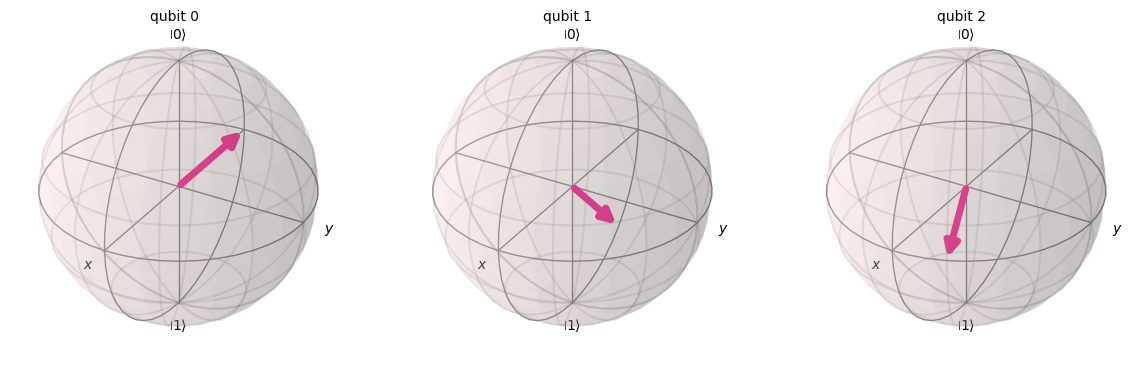

In [37]:
rotation_state = Statevector(qc); 
print(rotation_state)  

plot_bloch_multivector(rotation_state);

## Two-Qubit gates

#### Controlled-NOT Gate (CNOT)

The Controlled-NOT (CNOT) gate is a two-qubit gate that flips the state of the second qubit (target) if the first qubit (control) is in the ∣1⟩ state.

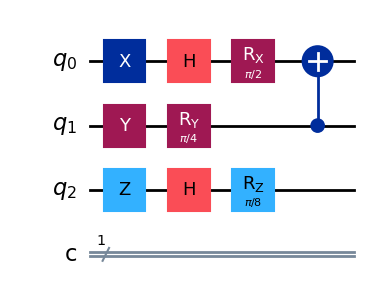

In [38]:
qc.cx(1,0);                        # Apply a CNOT with a q0 as control qubit and q1 as target qubit
qc.draw(output = 'mpl');

We can now show our qubits on the Bloch Sphere:

Statevector([ 0.10630376-0.15909482j, -0.10630376+0.15909482j,
              0.25663998-0.38408888j, -0.25663998+0.38408888j,
              0.15909482-0.10630376j, -0.15909482+0.10630376j,
              0.38408888-0.25663998j, -0.38408888+0.25663998j],
            dims=(2, 2, 2))


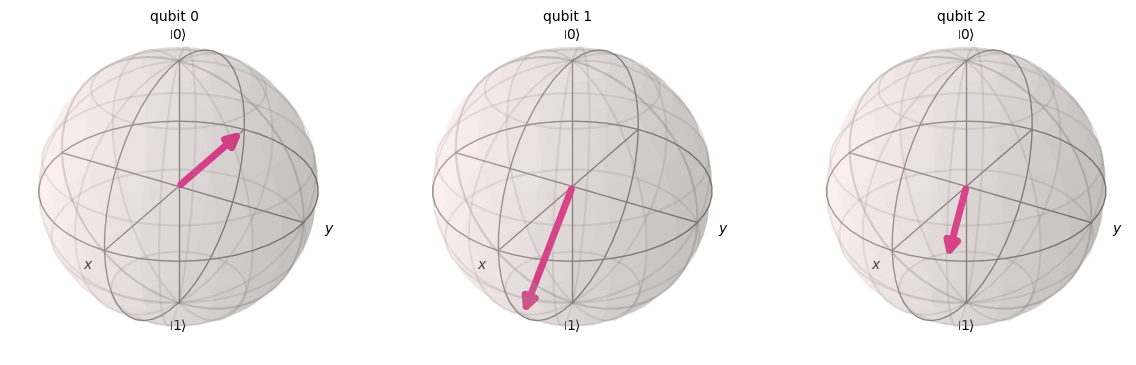

In [39]:
cnot_state = Statevector(qc); 
print(cnot_state)  

plot_bloch_multivector(cnot_state);

## Circuit measurement 

Let’s now run the circuit on a quantum simulator and look at the statistical results of repeated circuit preparation & measurement:

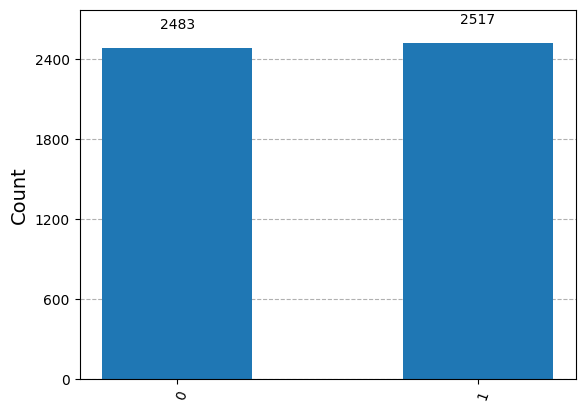

In [15]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=5000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts);

Let's check our backend to `qasm_simulator`:

Measurement counts: {'00': 508, '11': 492}

Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


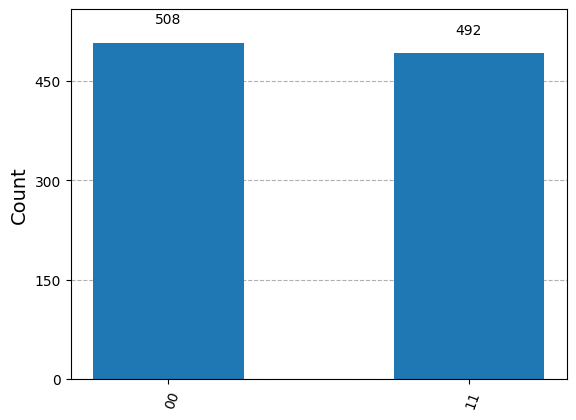

In [67]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Add gates
qc.h(0)        # Hadamard gate on qubit 0
qc.cx(0, 1)    # CNOT gate with control qubit 0 and target qubit 1

# Add measurements
qc.measure([0,1], [0,1])

# Create the QASM simulator backend
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
transpiled_circuit = transpile(qc, backend)

# Run the circuit on the simulator
job = backend.run(transpiled_circuit, shots=1000)

# Get the results
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts()

# Print the results
print("Measurement counts:", counts)

# Show the circuit
print("\nCircuit:")
print(qc)

# Optional: Visualize the results
plot_histogram(counts);

# Quantum teleportation

This section walks through a popular quantum information technique known as *quantum teleportation*. While teleportation has been thought of as the stuff of sci-fi legend, we are going to prove that it is actually already possible today! The technique leverages many foundational principles of quantum computing, and it has lots of useful applications across the entire field. These principles include (but are not limited to): the no-cloning theorem, quantum entanglement, and the principle of deferred measurement. Let’s dive in! 

<div align="center">
  <img src="../images/teleportation/socialthumbnail_large_Quantum_Teleportation.png" width="85%">
</div>

Goal: Transferring Quantum Information
--------------------------------------

Suppose there are two researchers named Alice and Bob, and Alice wants
to send her quantum state to Bob. The quantum teleportation protocol
enables Alice to do exactly this in a very elegant manner, and it can be
described in four steps:

1\. State preparation: Alice initializes her qubit to the state she wishes to teleport.

2\. Shared entanglement: A Bell state is created and distributed to Alice and Bob (one qubit each).

3\. Change of basis: Alice converts her two qubits from the Bell basis to the computational basis.

4\. Measurement: Alice measures her two qubits, then tells Bob how to convert his qubit to obtain the desired state. Note that it is only quantum *information* being teleported, and not a physical particle.

An overview of the protocol can be seen here:

<div align="center">
  <img src="../images/teleportation/teleport_circuit_full_text.svg" width="85%">
</div>

Problem: The No-Cloning Theorem
-------------------------------

You might be wondering why we need to teleport a state at all. Can\'t
Alice just make a copy of it and send the copy to Bob? It turns out that
copying arbitrary states is *prohibited*, which you can understand using
something called the **no-cloning theorem**. The proof is surprisingly
straightforward. Suppose we would like to design a circuit (unitary
transformation) $U$ that can perform the following action:

$$\begin{aligned}
\begin{align*}
U(\vert \psi\rangle \otimes \vert s\rangle ) &= \vert \psi\rangle \otimes \vert \psi\rangle, \\
U(\vert \varphi\rangle \otimes \vert s\rangle ) &= \vert \varphi \rangle \otimes \vert \varphi \rangle,
\end{align*}
\end{aligned}$$

where $\vert \psi\rangle$ and $\vert \varphi\rangle$ are arbitrary,
normalized single-qubit states, and $\vert s \rangle$ is some arbitrary,
normalized starting state. We will now prove that no such $U$ exists!

First, let\'s take the inner product of the left-hand sides of the two
equations:

$$(\langle \psi \vert \otimes \langle s \vert) U^\dagger U(\vert \varphi\rangle \otimes \vert s\rangle ) = \langle \psi \vert \varphi\rangle \  \langle s \vert s\rangle$$

Since $\langle s \vert s\rangle$ equals 1, this evaluates to
$\langle \psi \vert \varphi \rangle$. Next, we compare the inner product
of the right-hand sides of the two equations:
$(\langle \psi \vert \varphi \rangle)^2$. These inner products must be
equal, and they are only equal if they are a value that squares to
itself. The only valid values for the inner product then are 1 and 0.
But if the inner product is 1, the states are the same; on the other
hand, if the inner product is 0, the states are orthogonal. Therefore,
we can\'t clone arbitrary states!


Solution: Quantum Teleportation
-------------------------------

We will now walk through how to share quantum information without
cloning it, one step at a time.

I. State preparation
====================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_state_preparation.svg" width="85%">
</div>

Teleportation involves three qubits. Two of them are held by Alice, and
the third by Bob. We\'ll denote their states using subscripts:

1.  $\vert\cdot\rangle_S$, Alice\'s first qubit that she will prepare in
    some arbitrary state
2.  $\vert\cdot\rangle_A$, Alice\'s auxiliary (or \"ancilla\") qubit
    that she will entangle with Bob\'s qubit for communication purposes
3.  $\vert \cdot\rangle_B$, Bob\'s qubit that will receive the
    teleported state

Together, their starting state is:

$$\vert 0\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$

The first thing Alice does is prepare her first qubit in whichever state
$\vert
\psi\rangle$ that she\'d like to send to Bob so that their combined
state becomes:

$$\vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$


II. Shared entanglement
======================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_entanglement.svg" width="85%">
</div>

The reason why teleportation works is the use of an *entangled state* as
a shared resource between Alice and Bob. You can imagine some process
that generates a pair of entangled qubits, and sends one qubit to each
party. For simplicity (and simulation!), we will represent the
entanglement process as part of our circuit.

Entangling the qubits $A$ and $B$ leads to the combined state:

$$\frac{1}{\sqrt{2}}\left( \vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B + \vert \psi\rangle_S \vert 1\rangle_A \vert 1\rangle_B \right)\tag{1}$$

The $AB$ subsystem is now in what is known as a *Bell state*. There are
four maximally entangled two-qubit Bell states, and they form the Bell
basis:

$$\begin{aligned}
\begin{align*}
\vert \psi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle + \vert 11\rangle \right), \\
\vert \psi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle - \vert 11\rangle \right), \\
\vert \phi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle + \vert 10\rangle \right), \\
\vert \phi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle - \vert 10\rangle \right).
\end{align*}
\end{aligned}$$

In our experiment, because $AB$ started in the $\vert 00\rangle$ state,
we create the $\vert \psi_+\rangle$ Bell state as is shown in equation
(1).


From now on, the qubit subscripts will be removed from states for
brevity.

III. Change of basis
==================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_change_of_basis.svg" width="85%">
</div>

This is where things get tricky, but also very interesting. The third
step of the protocol is to apply a CNOT and a Hadamard to the first two
qubits. This is done prior to the measurements, and labelled \"change of
basis\". But what basis is this? Notice how these two gates are the
*opposite* of what we do to create a Bell state. If we run them in the
opposite direction, we transform the basis back to the computational
one, and simulate a measurement in the Bell basis.

After the basis transform, if we observe the first two qubits to be in
the state $\vert 00\rangle$, this would correspond to the outcome
$\vert \psi_+\rangle$ in the Bell basis, $\vert 11\rangle$ would
correspond to $\vert \phi_-\rangle$, etc. Let\'s perform this change of
basis, one step at a time.

Suppose we write our initial state $\vert \psi\rangle$ as
$\alpha\vert 0\rangle + \beta\vert 1\rangle$, with $\alpha$ and $\beta$
being complex coefficients. Expanding out the terms from (1), we obtain:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 100\rangle + \alpha \vert 011\rangle +
\beta\vert 111\rangle )$$

Now let\'s apply a CNOT between Alice\'s two qubits:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 110\rangle + \alpha \vert 011\rangle +
\beta\vert 101\rangle )$$

And then a Hadamard on her first qubit:

$$\frac{1}{2} ( \alpha \vert 000\rangle + \alpha\vert 100\rangle + \beta\vert 010\rangle - \beta\vert 110\rangle + \alpha \vert 011\rangle + \alpha \vert 111 \rangle + \beta\vert 001\rangle - \beta\vert 101 \rangle ).$$

Now we need to do some rearranging. We group the terms based on the
first two qubits:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\beta\vert 0\rangle + \alpha\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (-\beta\vert 0\rangle + \alpha\vert 1\rangle).\tag{2}$$

IV. Measurement
==============

<div align="center">
  <img src="../images/teleportation/teleport_circuit_measurement.svg" width="85%">
</div>

The last step of the protocol involves Alice performing a measurement on
her qubits, and telling Bob to perform some operations depending on what
she measured. But why exactly do we need to do this? In the previous
step, we already performed a basis rotation back to the computational
basis, so shouldn\'t we be good to go? Not quite, but almost!

Let\'s take another look at equation (2). If Alice measures her two
qubits in the computational basis, she is equally likely to obtain any
of the four possible outcomes. If she observes the first two qubits in
the state $\vert 00 \rangle$, she would immediately know that Bob\'s
qubit was in the state $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$,
which is precisely the state we are trying to teleport!

If instead she observed the qubits in state $\vert 01\rangle$, she\'d
still know what state Bob has, but it\'s a little off from the original
state. In particular, we have:

$$\beta \vert 0 \rangle + \alpha \vert 1 \rangle = X \vert \psi \rangle.$$

After obtaining these results, Alice could tell Bob to simply apply an X
gate to his qubit to recover the original state. Similarly, if she
obtained $\vert 10\rangle$, she would tell him to apply a Z gate.

In the [\"traditional\" version of quantum
teleportation](https://quantum.country/teleportation), this is, in fact,
exactly what happens. Alice would call up Bob on the phone, tell him
which state she observed, and then he would be able to apply an
appropriate correction. In this situation, measurements are happening
partway through the protocol, and the results would be used to control
the application of future quantum gates. This is known as mid-circuit
measurement, and such mid-circuit measurements are expressed in
PennyLane using `qml.measure <pennylane.measure>`{.interpreted-text
role="func"}. Mid-circuit measurement results can be used to control
operations, and this is expressed in PennyLane using
`qml.cond <pennylane.cond>`{.interpreted-text role="func"}.


Conclusion
==========

Let\'s recap the concepts we\'ve just seen.
First, we established that quantum states cannot be arbitrarily copied due to the *no-cloning theorem*. Then, we learned about *quantum entanglement*. Once Alice and Bob shared an entangled pair of qubits, Alice performed a *change of basis* from the Bell basis to the computational basis. Finally, using the *principle of deferred measurement* when needed, Alice measured her two qubits and informed Bob on how to rotate his qubit into the desired state.

<div align="center">
  <img src="../images/teleportation/teleport_circuit_full_gates.svg" width="85%">
</div>

Just like that, Alice and Bob performed quantum teleportation, and with a fairly small circuit! Some of you may now be thinking that teleportation is impossible, and you would be in good company if so.
Einstein himself referred to the non-local nature of entanglement as \"spooky action at a distance\", but we can all rest easy: due to the need for classical communication from Alice to Bob, quantum states (in other words, information) still cannot be teleported faster than the speed of light. Don\'t let that take away from the importance of quantum teleportation! This protocol is a critical tool in quantum information processing, and now it is a tool that you wield.

Recap
==========

Let's say we are trying to teleport the quantum state $\vert \psi \rangle$ from Alice to Bob. The teleportation protocol can be summarized as follows:

1. Alice and Bob first create an entangled Bell pair between their two qubits. They do this by applying a Hadamard and CX gate.

2. Next, Alice applies a series of operations between the qubit with state $\vert \psi \rangle$ and her half of the Bell pair.

3. Finally, Alice measures both qubits (the one that initially contained $\vert \psi \rangle$ and the other that contained her half of the Bell pair), and reports these results to Bob.

4. Depending on what Alice says, Bob applies a couple of gates to his half of the Bell pair.

5. And voila! The state $\vert \psi \rangle$ has teleported to Bob's qubit.

In the version that we are building here, Bob will apply his gates conditioned on Alice's qubits, instead of the classical outcomes of the measurements that Alice did. There is a subtle difference between these two methods. While the first method (using Alice's qubits after measurement as the controls of Bob's gates) is easy to implement, the second method (using the classical results of Alice's measurement as controls of Bob's gates) allows quantum teleportation over long distances.

In [14]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2]);

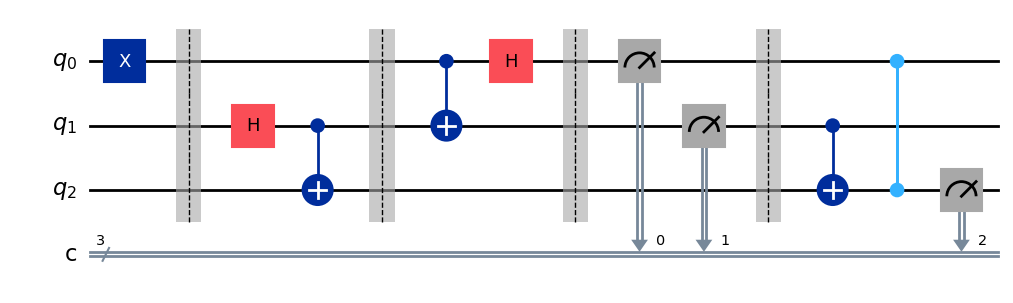

In [15]:
circuit.draw(output='mpl');

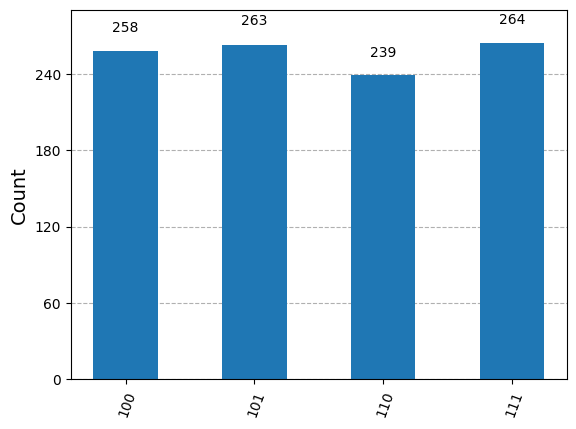

In [22]:
from qiskit_aer import Aer, AerSimulator

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)

sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts);

Note that the results above are ordered as $c_2c_1c_0$, with the bottom-most bit being $c_2$, which was the result of measuring the state in qubit 2. As you can see, the result is always $c_2 = 1$ since we teleported the state $\vert 1 \rangle$ to qubit 2.

# Bernstein-Vazirani Algorithm

The Bernstein-Vazirani algorithm is a quantum algorithm designed to efficiently find a secret string *s*. Imagine you have a hidden string of bits, and a special quantum function that, when given any input string *x*, returns the bitwise dot product of *x* and the secret string *s*. The goal is to figure out what the secret string *s* is. Classically, you'd need to query the function multiple times, testing different inputs to piece together the secret. However, the Bernstein-Vazirani algorithm uses quantum superposition and interference to determine the secret string *s* with just a single query to the quantum function, making it exponentially faster than any classical algorithm.

Consider a hidden Boolean function $f$ which takes in a string of $n$ bits $\\{x_0, x_1, \ldots x_{n-1}\\}$ and returns 1 for only a unique n-bit string $s = {s_0, s_1, \ldots s_{n-1}}$ and 0 otherwise.

How many attempts do we need to make to find the secret number $s$?

Classically, there are two approaches:

1. For an **n-bit secret number**, the first approach is to try all possible numbers from 0 to $2^n-1$. **This leads to an exponential number of attempts as $n$ grows**.

2. The second approach assumes that if the box isn't just giving a yes/no result if the number matches, but instead computes $s.x$ modulo 2, (this is a yes/no result as well, but we are now computing the bitwise AND between the two numbers $s$ and $x$, and adding up the results, and finally returning the sum modulo 2) then we can be a bit more clever and give the box $n$ different inputs (namely $2^0, 2^1, 2^2, \ldots, 2^{n-1}$) to reveal each of its bits. Check out the video to see how this works. **This method means that we would need to make $n$ attempts to find the secret number.**

**The Bernstein-Vazirani algorithm allows us to find the secret number in 1 attempt, independent of the size of the secret number.** 

## Building the circuit for the Bernstein-Vazirani algorithm

We begin by writing down the secret number.

In [24]:
s = '001010'

The algorithm requires $n+1$ qubits and $n$ classical bits, where $n$ is the length of the secret number.

In [25]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

The algorithm has four main parts.,

**Initialize the first $n$ qubits in the state $\\vert0\\rangle$, and the last qubit in the $\\vert1\\rangle$ state.** In Qiskit, all qubits are initialized in the $\\vert0\\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to $\\vert1\\rangle$ state by applying an $X$ gate.

1. **Apply Hadamard gates to all qubits.**

 2. **Build the box containing the secret number (also known as an \"oracle\").** We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that the there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1.

3. **Measure the first $n$ qubits in the Bell basis.** This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

In [26]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

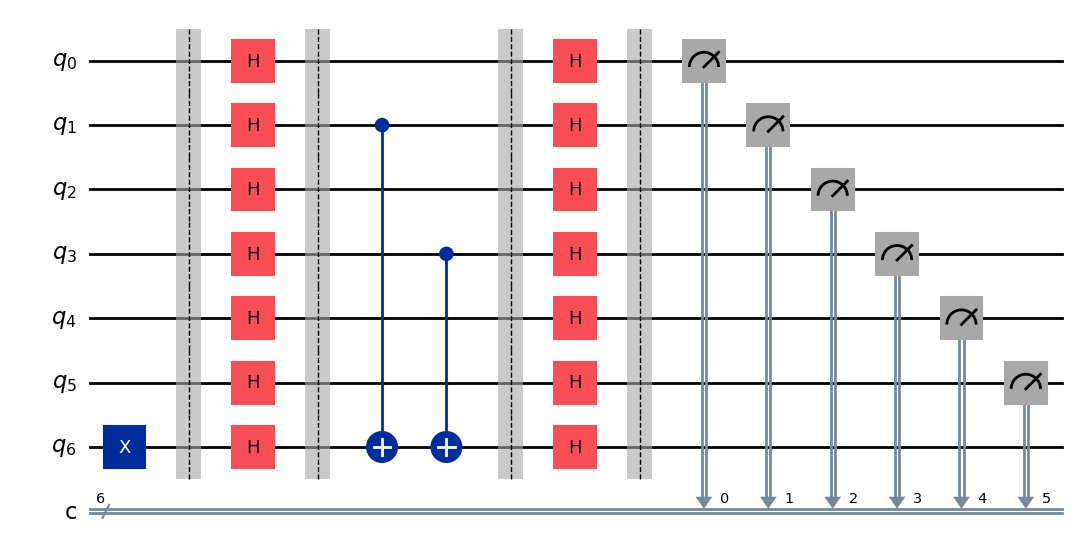

In [27]:
%matplotlib inline
circuit.draw(output='mpl');

## Running the Bernstein-Vazirani algorithm


Finally, let's simulate the circuit on `Aer` simulator. We will set the number of shots to 1.



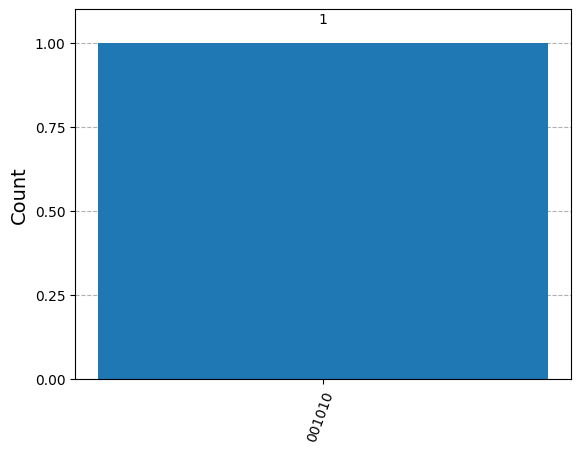

In [37]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)

sim_result = simulator.run(compiled_circuit, shots=1).result()
counts = sim_result.get_counts()

plot_histogram(counts);

In fact, setting the number of shots to 1000, we can still see that 100% of the results contain the secret number.

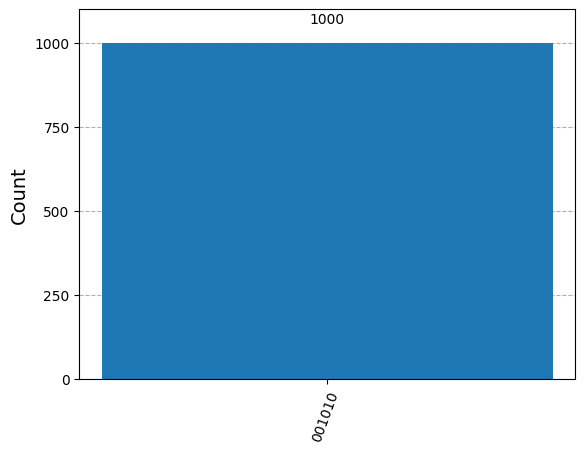

In [38]:
sim_result = simulator.run(compiled_circuit, shots=1000).result()
counts = sim_result.get_counts()

plot_histogram(counts);